In [144]:
%load_ext autoreload


In [149]:
%autoreload 2
import json
import requests
from src import image
from src import generateMockup.generateMockup
import cv2
import numpy as np

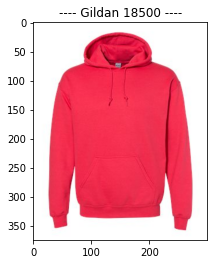

In [155]:
# Inputs
brand        = 'Gildan'
product_code = '18500'
color        = 'Paprika'
orientation  = 'Front'
username     = '493639'
password     = 'ade20a10-7d2d-4003-a296-e8d4939a70c5'

# Get SS Activewear response
response1 = requests.get("https://api.ssactivewear.com/v2/products/?style=" + brand + " " + product_code, auth=(username, password))
garments = response1.json()

# Get garment selection sorted by color
image_path = next(garment for garment in garments if garment["colorName"] == color)['color'+orientation+'Image']

# Get all color sizes and availability
garments = [x for x in map(lambda garment: garment if garment['colorName']=="White" else None, garments) if x is not None]

# Get Inventory
inventory = {}
for i in range(len(garments)):
    inventory[garments[i]['sizeName']] =  {warehouse['warehouseAbbr']: warehouse['qty'] for warehouse in garments[i]['warehouses']}

# Get image
img_data = requests.get("https://www.ssactivewear.com/"+image_path).content
img_data = cv2.imdecode(np.asarray(bytearray(img_data)), cv2.IMREAD_COLOR)
img = image.Image(img_data, brand+' '+product_code)
img.im_show()



In [ ]:
# Open Image from SS Activewear

img_data = requests.get("https://www.ssactivewear.com/Images/Color/17130_f_fl.jpg").content
# with open('image_name.jpg', 'wb') as handler:
#     handler.write(img_data)
img_data = cv2.imdecode(np.asarray(bytearray(img_data)), cv2.IMREAD_COLOR)
aqua = image.Image(img_data, 'Image 1')
aqua.im_show()
plt.show()

aqua.image[aqua.image > 253] = 0
aqua.im_show()

In [111]:
cities = ['Austin', 'Tacoma', 'Topeka', 'Sacramento', 'Charlotte']
temps = {city: [0 for i in range(7)] for city in cities}
print(temps)

{'Austin': [0, 0, 0, 0, 0, 0, 0], 'Tacoma': [0, 0, 0, 0, 0, 0, 0], 'Topeka': [0, 0, 0, 0, 0, 0, 0], 'Sacramento': [0, 0, 0, 0, 0, 0, 0], 'Charlotte': [0, 0, 0, 0, 0, 0, 0]}
